# Hospital Readmission

## Background

WellnessWorks is a healthcare company specializing in providing comprehensive health
services, including patient care, diagnostics, and preventive health measures. They aim to
leverage machine learning techniques to predict patient readmissions, improve patient outcomes,
and optimize hospital operations.

You have been hired as a Junior Data Analyst by Blink Health Solutions, the IT partner of
WellnessWorks. Blink Health wants you to investigate machine learning and its impact on
healthcare analytics. Additionally, you are required to develop a machine learning model for
WellnessWorks that can predict the likelihood of patient readmissions based on historical patient
data.

## Dataset

* Original Source: [Kaggle/datasets/dubradave/hospital-readmissions](https://kaggle.com/datasets/dubradave/hospital-readmissions)
* Import Source: [HuggingFace/datasets/prabinpanta0/genki_hospital](https://huggingface.co/datasets/prabinpanta0/genki_hospital)

## Import Nessecery packages

In [88]:
#import modules and packages needed
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

import huggingface as hf

## Loading the dataset

In [89]:
# Load the data
df = pd.read_csv("hf://datasets/prabinpanta0/genki_hospital/hospital_readmissions.csv")

## Data

10 years of patient information:

Information in the file

- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

In [90]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [91]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

## Data Cleaning

### renaming some columns

In [93]:
#renaming some columns

df.rename(columns={'diag_1':'primary_diagnosis','diag_2':'sec_diagnosis',
                       'diag_3':'additional_sec_diag','change':'med_change','A1Ctest':'HbA1ctest'},inplace=True)

df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


### Converting the age column to categorical data

In [94]:
#converting age column to categorical data
#checking for the unique values in the age column
print(df['age'].unique())

#creating a new column called age_cat
df['age_cat'] = df['age'].replace({'[70-80)':'senior-old age',
                                           '[50-60)':'late-middle age','[60-70)':'mid-old age',
                                           '[40-50)':'early-middle age','[80-90)':'very senior-old','[90-100)':'centenarians'})

print('\n')
#converting column type to categorical data type
df['age_cat'] = df['age_cat'].astype('category')
print('dtype :',df['age_cat'].dtype)

#viewing age and age_cat columns
df[['age','age_cat']]

['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']


dtype : category


,age,age_cat
0,[70-80),senior-old age
1,[70-80),senior-old age
2,[50-60),late-middle age
3,[70-80),senior-old age
4,[60-70),mid-old age
...,...,...
24995,[80-90),very senior-old
24996,[80-90),very senior-old
24997,[70-80),senior-old age
24998,[70-80),senior-old age


### drop age column

In [95]:
#drop age column
df.drop('age', axis=1, inplace=True)

#changing data type to the correct data type
# Columns to be converted to categorical datatype
cols_to_convert = ['medical_specialty', 'primary_diagnosis', 'sec_diagnosis', 'additional_sec_diag', 'glucose_test', 'HbA1ctest', 'med_change', 'diabetes_med', 'readmitted']

# Convert columns to categorical datatype
df[cols_to_convert] = df[cols_to_convert].astype('category')
#checking data type
df.dtypes

time_in_hospital          int64
n_lab_procedures          int64
n_procedures              int64
n_medications             int64
n_outpatient              int64
n_inpatient               int64
n_emergency               int64
medical_specialty      category
primary_diagnosis      category
sec_diagnosis          category
additional_sec_diag    category
glucose_test           category
HbA1ctest              category
med_change             category
diabetes_med           category
readmitted             category
age_cat                category
dtype: object

The dataset contained 2500 rows and 17 columns, and these were what I did to the columns:

- There were no missing or duplicates data in the dataframe.
- The columns named diag_1 ,diag_2,diag_3,change,A1Ctest, were renamed as primary_diagnosis ,sec_diagnos ,additional_sec_diag ,med_change , HbA1ctest respectively
- For the age column although the wrong categorization done already couldn't be corrected, the various age categories named as [70-80), [50-60),[60-70), [40-50), [80-90),[90-100), were renamed as senior-old age, late-middle age , mid-oldd-age, early-middle age, very senior-old,centenarians respectively.
- The data type of these rows (medical_specialty, primary_diagnosis , sec_diagnosis, additional_sec_diag, glucose_test, HbA1ctest, med_change, diabetes_med, readmitted)were converted to categorical data type

At the end there was 2500 rows and 17 columns .

## DATA ANALYSIS

In [92]:
# Complete analysis of the dataset
df.describe()


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [103]:
#describing the categorical columns
df.describe(exclude=[np.number])

,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,7,8,8,8,3,3,2,2,2,6
top,Missing,Circulatory,Other,Other,no,no,no,yes,no,senior-old age
freq,12382,7824,9056,9107,23625,20938,13497,19228,13246,6837


### Viewing the unique values in the dataset

In [96]:
# Checking the unique values in the dataset
df.nunique()

time_in_hospital        14
n_lab_procedures       109
n_procedures             7
n_medications           70
n_outpatient            23
n_inpatient             16
n_emergency             21
medical_specialty        7
primary_diagnosis        8
sec_diagnosis            8
additional_sec_diag      8
glucose_test             3
HbA1ctest                3
med_change               2
diabetes_med             2
readmitted               2
age_cat                  6
dtype: int64

### checking the null value

In [97]:
#checking the null value
df.isnull().sum()


time_in_hospital       0
n_lab_procedures       0
n_procedures           0
n_medications          0
n_outpatient           0
n_inpatient            0
n_emergency            0
medical_specialty      0
primary_diagnosis      0
sec_diagnosis          0
additional_sec_diag    0
glucose_test           0
HbA1ctest              0
med_change             0
diabetes_med           0
readmitted             0
age_cat                0
dtype: int64

### Checking the duplicate values

In [98]:
# Checking the duplicate values
df.duplicated().sum()


0

## visualization

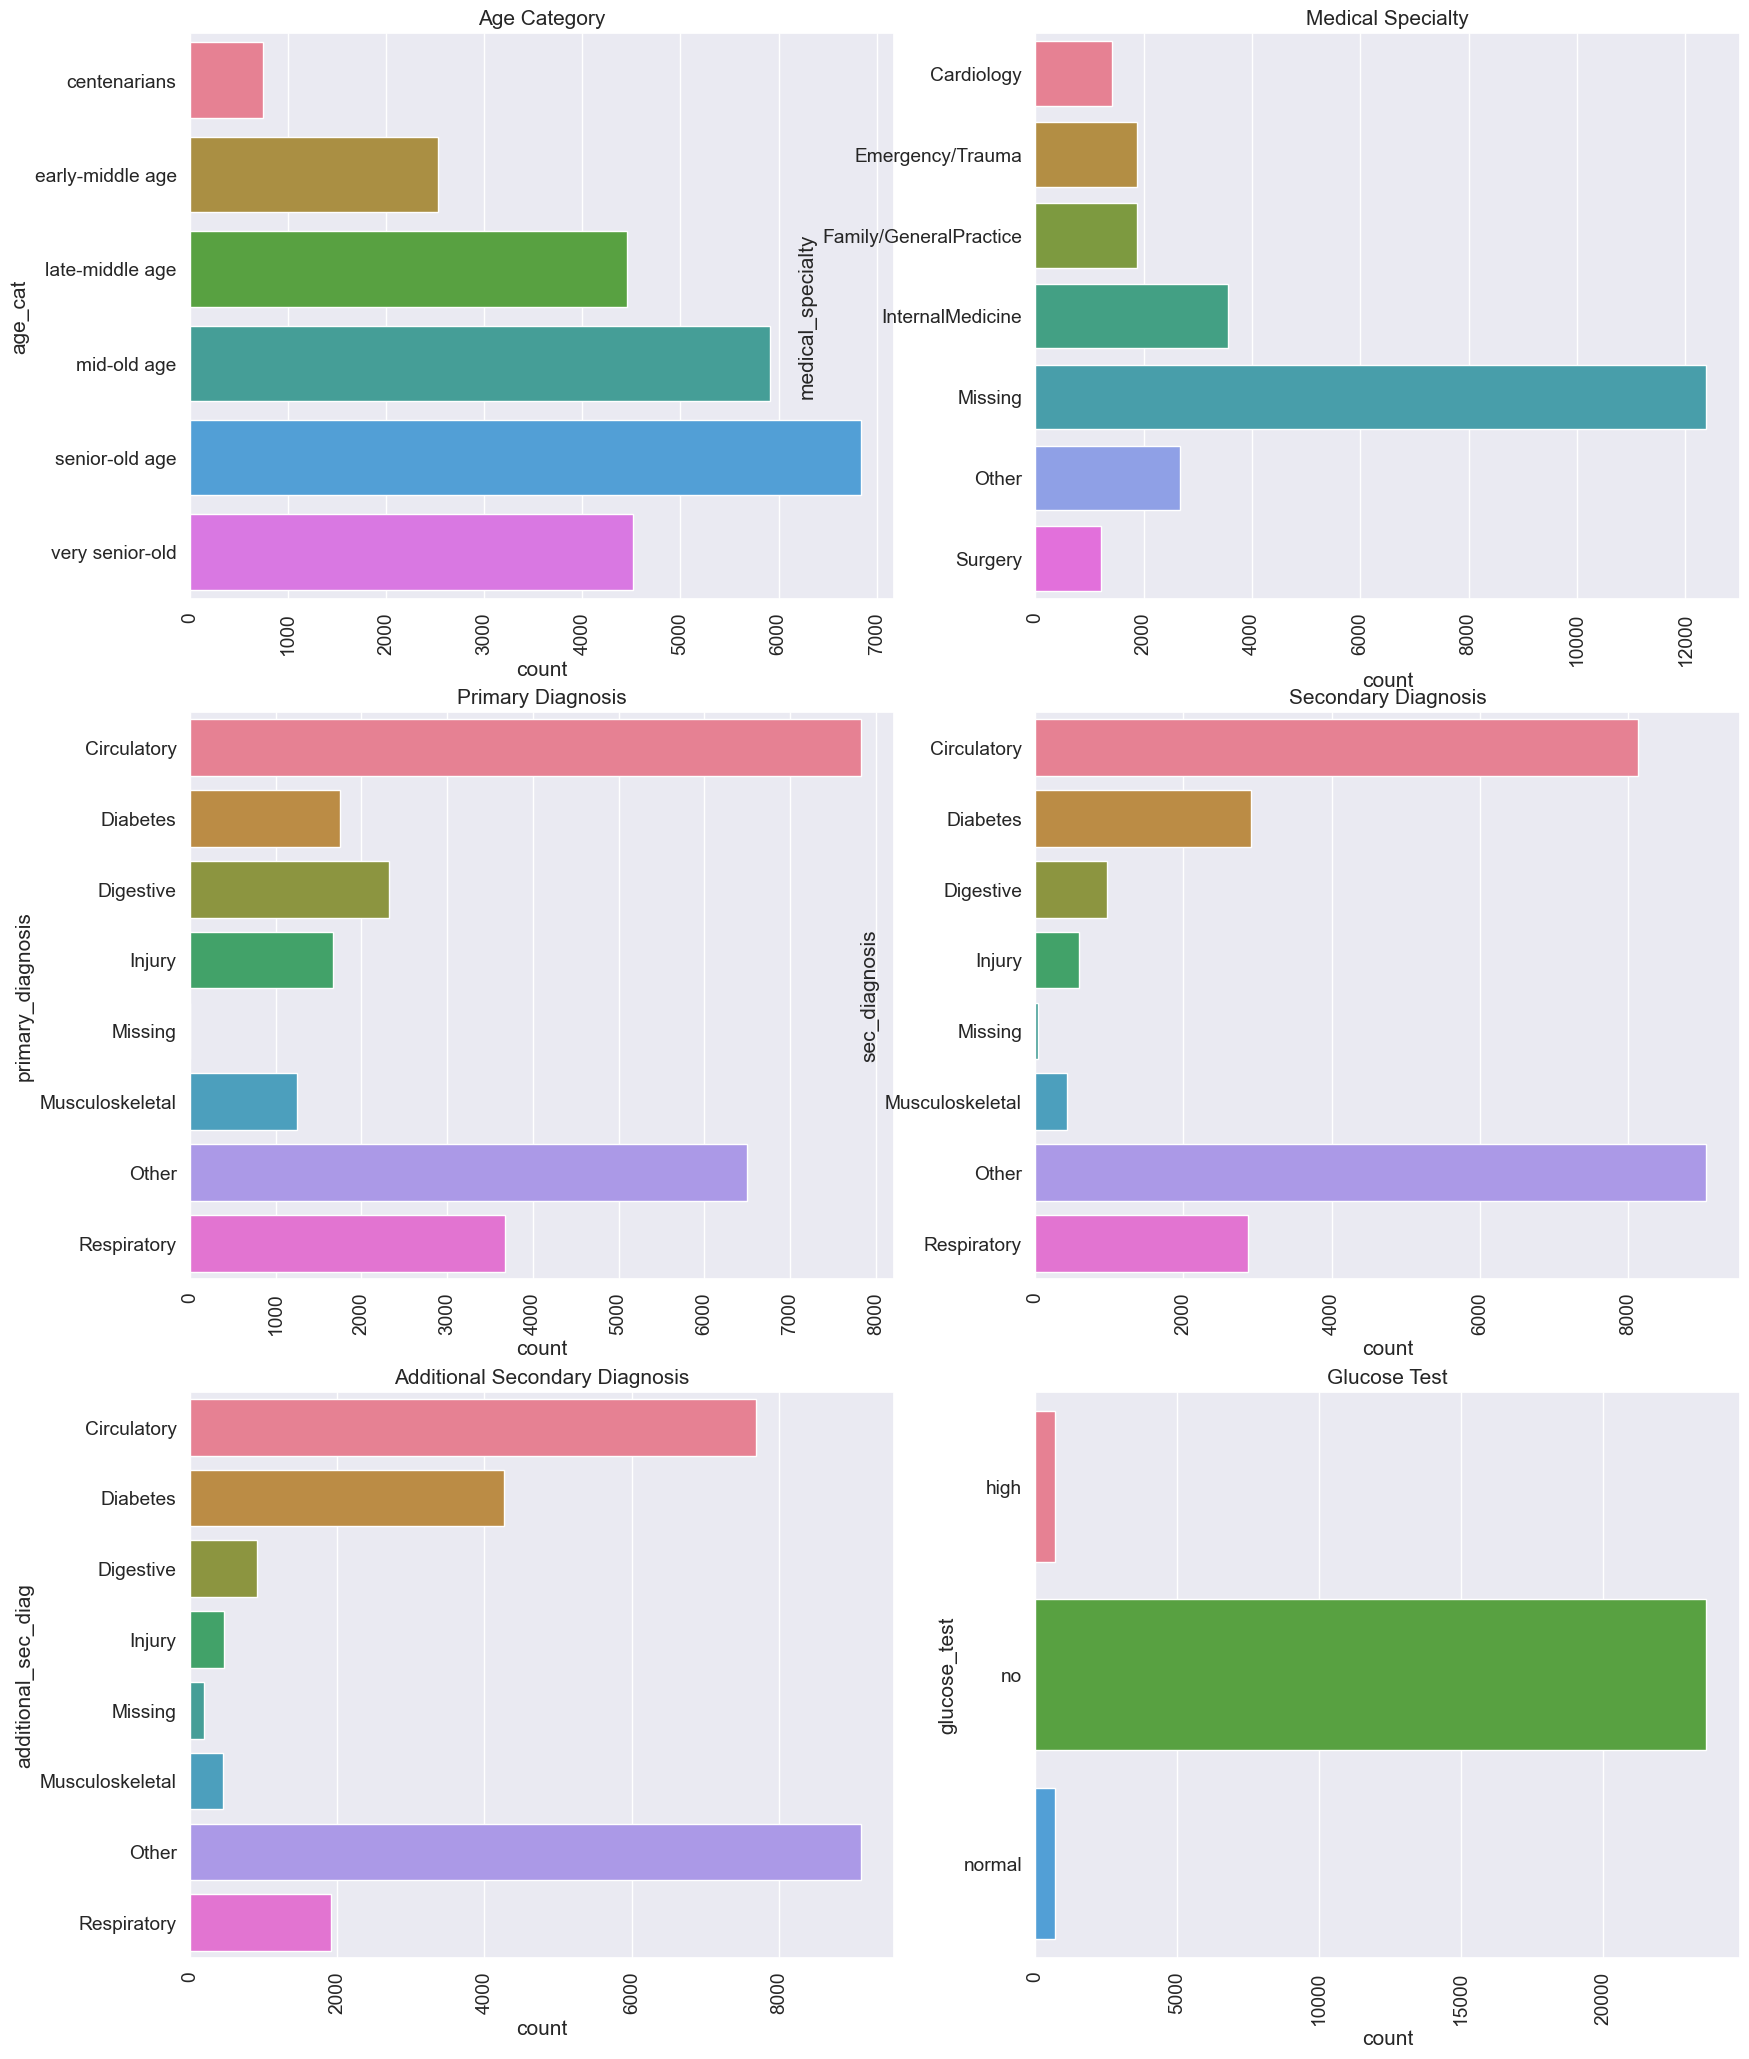

In [116]:
#visualize the information above for easy understanding
#value counting the categorical columns
plt.figure(figsize = (20, 25))
plt.subplot(3, 2, 1)
sns.countplot(y='age_cat', hue='age_cat', data=df)
plt.title('Age Category')
plt.xticks(rotation=90)


plt.subplot(3, 2, 2)
sns.countplot(y='medical_specialty', hue='medical_specialty', data=df)
plt.title('Medical Specialty')
plt.xticks(rotation=90)


plt.subplot(3, 2, 3)
sns.countplot(y='primary_diagnosis', hue='primary_diagnosis', data=df)
plt.title('Primary Diagnosis')
plt.xticks(rotation=90)


plt.subplot(3, 2, 4)
sns.countplot(y='sec_diagnosis', hue='sec_diagnosis', data=df)
plt.title('Secondary Diagnosis')
plt.xticks(rotation=90)


plt.subplot(3, 2, 5)
sns.countplot(y='additional_sec_diag', hue='additional_sec_diag', data=df)
plt.title('Additional Secondary Diagnosis')
plt.xticks(rotation=90)


plt.subplot(3, 2, 6)
sns.countplot(y='glucose_test', hue='glucose_test', data=df)
plt.title('Glucose Test')
plt.xticks(rotation=90)
plt.show()